In [16]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv('bank.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

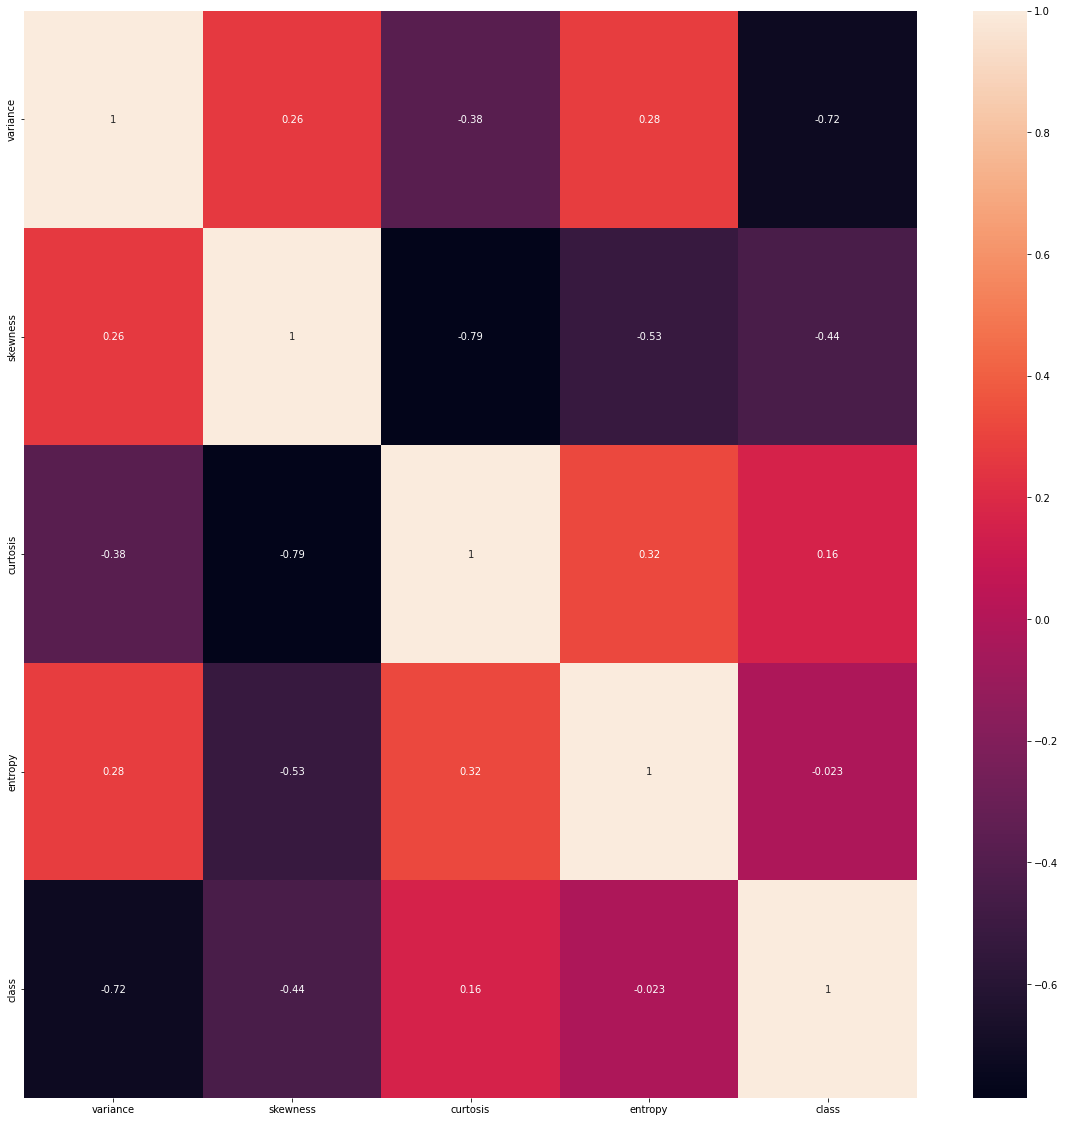

In [20]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred1=classifier.predict(x_test)
y_pred2=knn.predict(x_test)

In [27]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [28]:
import pickle
pickle_out = open("knn.pkl","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
score1=accuracy_score(y_test,y_pred1)
score1

0.9854545454545455

In [33]:
score2=accuracy_score(y_test,y_pred2)
score2

1.0

In [29]:
classifier.predict([[0.32924,-4.4552,4.5718,-0.98880]])

e:\projects\bank authentication\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [30]:
knn.predict([[0.32924,-4.4552,4.5718,-0.98880]])

e:\projects\bank authentication\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)